### Building a simple neural network with keras

This notebook contains code which trains a simple neural network model to recognize digits. The data used is the built in *digits* data set from Kaggle. 

In [1]:
from sklearn.datasets import  load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data = load_digits()
raw_data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [3]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(raw_data.images)
features = raw_data.images.reshape((n_samples, -1))

In [4]:
features[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

### Building the network 

*Keras* is a user-friendly package for building neural network models. It uses as a backend either Tensorflow or Theano. In my case, I am setting Theano as a backend due to some Tensorflow incompatabilities with other packages I have. But TensorFlow tends to be the more popular choice. Though in the end of the day, it shouldn't matter. 

In [6]:
# Here I am changing the backend to theano; if you have a working tensorflow on your machine, you can skip this part
import os
os.environ['KERAS_BACKEND'] = 'theano'

In [7]:
from keras.utils import to_categorical
import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\C49091\AppData\Local\Continuum\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [8]:
# Transform the target to  categorical 
target = to_categorical(raw_data.target)

In [9]:
# How does the target look like now? We print it for the first row, we see it is an array of 10 digits, corresponding to
# the labels of teh digits from 0 to 9; in this case, the first image it of the digit 0

target[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

It is really important with neural network models to have standardize/scaled the features. In this case, I will use the builtin sklearn StandardScaler module. 

In [10]:
scaler = StandardScaler()
train = scaler.fit_transform(features)

In [11]:
# Perform a train_test_split

X_train, X_test,y_train, y_test = train_test_split(train, target, train_size=0.3, random_state=42)

In [12]:
n_cols = X_train.shape[1]
output_cols = y_train.shape[1]
print('Output size: ', output_cols)
print('Number of columns: ', n_cols)

Output size:  10
Number of columns:  64


#### Step 1: define the model  

In [13]:
model = Sequential()

In [15]:
# Define the input layer
model.add(Dense(100, input_shape=(n_cols,), activation='relu'))

# Add hidden layers (fully connected, aka dense)
model.add(Dense(100, activation='relu'))

# Add output layer with a softmax activation to make sure the predicted prob will sum up to 1 
model.add(Dense(output_cols, activation="softmax"))

# Compile the model where we specify the optimizer, the loss function and metrics
# NOTE: Since we have a multi-class classification problem, we need to use the categorical_crossentropy
# For binary problems, we tend to use the binary_crossentropy 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### Step 2: train it

In [16]:
# Now we train/fit the model on our data and save its history

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Train on 539 samples, validate on 1258 samples
Epoch 1/10
539/539 [==============================] - 71s 132ms/step - loss: 2.2866 - acc: 0.1781 - val_loss: 2.2581 - val_acc: 0.2520
Epoch 2/10
539/539 [==============================] - 72s 133ms/step - loss: 2.1831 - acc: 0.3711 - val_loss: 2.0913 - val_acc: 0.4157
Epoch 3/10
539/539 [==============================] - 69s 128ms/step - loss: 1.9081 - acc: 0.5455 - val_loss: 1.7463 - val_acc: 0.5620
Epoch 4/10
539/539 [==============================] - 70s 131ms/step - loss: 1.4830 - acc: 0.6215 - val_loss: 1.3435 - val_acc: 0.5994
Epoch 5/10
539/539 [==============================] - 68s 127ms/step - loss: 1.0620 - acc: 0.7069 - val_loss: 1.0049 - val_acc: 0.7448
Epoch 6/10
539/539 [==============================] - 65s 120ms/step - loss: 0.7351 - acc: 0.8646 - val_loss: 0.7051 - val_acc: 0.8362
Epoch 7/10
539/539 [==============================] - 68s 126ms/step - loss: 0.5000 - acc: 0.9147 - val_loss: 0.5299 - val_acc: 0.8744
Epoch 8/

In [17]:
# We can plot the plot_loss and plot_accuracy

def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

def plot_accuracy(acc,val_acc):
      # Plot training & validation accuracy values
    plt.figure()
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

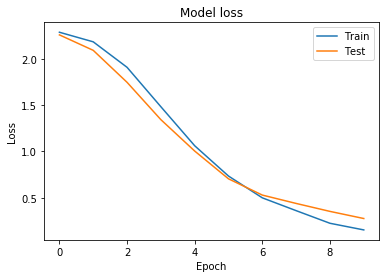

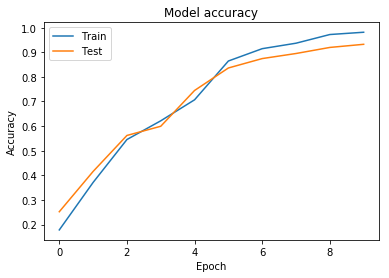

In [18]:
# Plot train vs test loss during training
plot_loss(history.history['loss'], history.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(history.history['acc'], history.history['val_acc'])

We see that the accuracy is pretty high even in earlier epochs. We could come up with an early stopping rule, which will stop training the model once we have reached a certain accuracy level, for example. 

Also, this has definitely overfit.

In [20]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Fit the model, with fewer epochs and the early stopping rule in place
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), callbacks=[early_stopping])

Train on 539 samples, validate on 1258 samples
Epoch 1/15
539/539 [==============================] - 140s 260ms/step - loss: 0.0312 - acc: 0.9963 - val_loss: 0.2349 - val_acc: 0.9388
Epoch 2/15
539/539 [==============================] - 135s 251ms/step - loss: 0.0286 - acc: 0.9963 - val_loss: 0.2400 - val_acc: 0.9396
Epoch 3/15
539/539 [==============================] - 122s 227ms/step - loss: 0.0273 - acc: 0.9963 - val_loss: 0.2435 - val_acc: 0.9404
Epoch 4/15
539/539 [==============================] - 121s 224ms/step - loss: 0.0245 - acc: 0.9963 - val_loss: 0.2557 - val_acc: 0.9388


#### Step 3: Evaluate the model  

In [21]:
# We can predict on the X_test
preds = model.predict(X_test)

# Pick the highest probability  
preds1 = np.argmax(preds, axis=1)

In [22]:
# We can evaluate the model 
loss_and_metrics = model.evaluate(X_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.2556798649931087
Test Accuracy 0.93879173290938


In [24]:
# Extract max of the y_test
y_test_max = np.argmax(y_test, axis=1)

# Put the extracted and the max of the y_test
c = (np.expand_dims(y_test_max, 1) , np.expand_dims(preds1, 1))
data_compare = np.array(np.concatenate(c, axis = 1))
df_compare = pd.DataFrame(data_compare, columns=['real_label', 'predicted_label'])
df_compare.head()

,real_label,predicted_label
0,6,6
1,9,9
2,3,3
3,7,9
4,2,2


In [27]:
df_compare['difference'] = np.abs(df_compare.real_label - df_compare.predicted_label) 
df_compare[df_compare.difference != 0] # 77 rows misclassified 

,real_label,predicted_label,difference
3,7,9,2
5,1,2,1
26,3,2,1
43,3,2,1
60,0,5,5
133,7,9,2
149,3,5,2
156,3,2,1
159,9,7,2
162,9,3,6
